Import Dependencies and Pre-trained model

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Preprocess image and load

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img

In [ ]:
from google.colab import files
files.upload()

Saving art2.jpg to art2.jpg


{'art2.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x00\x00\x00\x00\x00\xff\xe1\x00.Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02@\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00@\x01\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\n\x07\x07\t\x07\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1e\x16\x17\x12\x19$ &%# #"(-90(*6+"#2D26;=@@@&0FKE>J9?@=\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d=)#)==================================================\xff\xc0\x00\x11\x08\x01\xda\x01\xda\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94

In [ ]:
content_image = load_image('/content/davika.jpg')
style_image = load_image('/content/art2.jpg')

Visualize Output

In [ ]:
content_image.shape

TensorShape([1, 700, 500, 3])

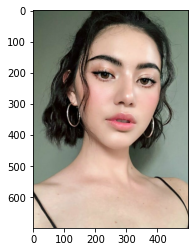

In [ ]:
plt.imshow(np.squeeze(content_image))
plt.show()

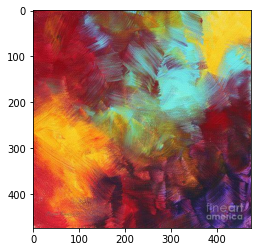

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

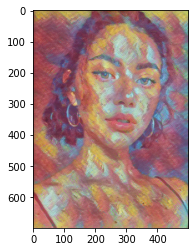

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('hasil.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True